# Digital Equity and Inclusion - Machine Learning to close the digital divide #
                  
   **Jason Kronemeyer (jfkrone@umich.edu), Liang Yao(yaoliang@umich.edu), Samuel Buxton (sambux@umich.edu)**



1. [The Goal](#the-goal)
2. [Section 1: Principal Component Analysis](#section-1)
    - [Setup](#setup)
    - [Which variables correlate in each component?](#which-variables-correlate-in-each-component)
3. [Section 2: Clustering](#clustering)
    - [Can we find clusters in the data that point to the relative significance of the variables?](#can-we-find-clusters-in-the-data-that-point-to-the-relative-significance-of-the-variables)
    - [How many clusters should we use?](#how-many-clusters-should-we-use)
    - [Cluster Labeling - Improving Cluster Representations](#cluster-labeling---improving-cluster-representations)

# The Goal

**This project aims to measure and forecast progress on digital equity in Michigan. Digital equity refers to the equal distribution of digital resources and opportunities, including access to high-speed internet, digital devices, and digital literacy training. One challenge in this project is the availability and quality of data on digital equity in Michigan. Another challenge is the complexity of the problem, as there are many socioeconomic factors that contribute to the digital divide.**
 
The project will consist of two parts:

**Part Part A (Unsupervised learning):** Our goal is know about the patterns or structure of the dataset, and identify the principal components in the data that can help us to understand and predict progress on digital equity in Michigan. These principal components will reflect commonalities among groups of individuals with low digital equity.

**Part A(Supervised learning):** Our goal in this section is to train easily interpretable supervised learning models to forecast digital equity statistics in areas of Michigan. We aim to provide additional insight into which factors are the most important in deciding digital equity, and ultimately recommend policy decisions that could use this insight to better allocate public funds. Since we are using both categorical and quantitative variables to predict our quantitative equity metric, we plan to compare the efficacy of a lasso regression approach.

# Section 1 - Principal Component Analysis
## Setup

In [1]:
# Install libraries
#!pip install geopandas

In [4]:
# Get rid of warnings

import warnings
warnings.filterwarnings('ignore')

In [5]:
# Import packages we need

from datetime import datetime

import geopandas as gp
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import pandas as pd
import geopandas as gp

from shapely.geometry import Point

In [6]:
# Display settings
%config InlineBackend.figure_format = "retina" # make figures look better 

In [9]:
# Set Data file location prefix

data_loc = "../../DATA/results/"
#data_loc = "./assets/"

In [10]:
gdf = gp.read_file(data_loc + "sections_with_network.shp")
gdf.columns

Index(['OBJECTID_1', 'OBJECTID_l', 'michigan_M', 'PERIMETER', 'TOWN', 'RANGE',
       'SECTION', 'SEC', 'TWNRNG', 'TWNRNGSEC', 'CLAIM', 'GOVLOT', 'OTHER',
       'COUNTY', 'Shape_STAr', 'Shape_STLe', 'Shape_ST_1', 'Shape_ST_2',
       'Shape_ST_3', 'Shape_ST_4', 'ShapeSTAre', 'ShapeSTLen', 'index_righ',
       'quadkey', 'avg_d_kbps', 'avg_u_kbps', 'avg_lat_ms', 'tests', 'devices',
       'index_ri_1', 'OBJECTID_r', 'FIPSCODE', 'FIPSNUM', 'NAME', 'LABEL',
       'TYPE', 'SQKM', 'SQMILES', 'ACRES', 'VER', 'LAYOUT', 'PENINSULA',
       'ShapeSTA_1', 'ShapeSTL_1', 'avg_d_mbps', 'avg_u_mbps', 'year_qtr',
       'geometry'],
      dtype='object')

In [11]:
display(gdf)

,OBJECTID_1,OBJECTID_l,michigan_M,PERIMETER,TOWN,RANGE,SECTION,SEC,TWNRNG,TWNRNGSEC,...,ACRES,VER,LAYOUT,PENINSULA,ShapeSTA_1,ShapeSTL_1,avg_d_mbps,avg_u_mbps,year_qtr,geometry
0,2570,2570,0,6485.97772,51N,06W,36,36,51N06W,51N06W36,...,157328.305068,20,portrait,upper,6.366919e+08,127804.341492,140.191,13.924,None,"POLYGON ((-84.98595 46.76794, -85.00682 46.767..."
1,2694,2694,0,6393.37485,50N,06W,01,1,50N06W,50N06W01,...,157328.305068,20,portrait,upper,6.366919e+08,127804.341492,140.191,13.924,None,"POLYGON ((-85.00682 46.76797, -84.98595 46.767..."
2,2571,2571,0,6458.82090,51N,05W,31,31,51N05W,51N05W31,...,157328.305068,20,portrait,upper,6.366919e+08,127804.341492,282.976,12.035,None,"POLYGON ((-84.98595 46.76794, -84.98585 46.772..."
3,2571,2571,0,6458.82090,51N,05W,31,31,51N05W,51N05W31,...,157328.305068,20,portrait,upper,6.366919e+08,127804.341492,161.031,26.575,None,"POLYGON ((-84.98595 46.76794, -84.98585 46.772..."
4,2571,2571,0,6458.82090,51N,05W,31,31,51N05W,51N05W31,...,157328.305068,20,portrait,upper,6.366919e+08,127804.341492,116.792,13.016,None,"POLYGON ((-84.98595 46.76794, -84.98585 46.772..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18290,18159,18159,0,6159.51256,40N,04W,23,23,40N04W,40N04W23,...,85099.650429,20,portrait,upper,3.443898e+08,142477.241684,32.739,11.105,None,"POLYGON ((-84.77850 45.85345, -84.77716 45.853..."
18291,18159,18159,0,6159.51256,40N,04W,23,23,40N04W,40N04W23,...,85099.650429,20,portrait,upper,3.443898e+08,142477.241684,25.182,10.108,2019q4,"POLYGON ((-84.77850 45.85345, -84.77716 45.853..."
18292,18159,18159,0,6159.51256,40N,04W,23,23,40N04W,40N04W23,...,85099.650429,20,portrait,upper,3.443898e+08,142477.241684,15.847,10.702,2020q1,"POLYGON ((-84.77850 45.85345, -84.77716 45.853..."
18293,18159,18159,0,6159.51256,40N,04W,23,23,40N04W,40N04W23,...,85099.650429,20,portrait,upper,3.443898e+08,142477.241684,250.100,14.285,None,"POLYGON ((-84.77850 45.85345, -84.77716 45.853..."


In [12]:
gdf['year_qtr'].value_counts()

2022q3    1382
2020q3    1159
2023q2    1089
2019q4    1036
2020q2    1035
2019q3     963
2022q4     931
2020q1     877
2020q4     788
2023q1     726
2019q2     703
2019q1     611
Name: year_qtr, dtype: int64

In [15]:
gdf['TWNRNGSEC'].value_counts()

40N03W      381
47N01E07    303
47N01E06    212
47N01E08    210
47N01E05    202
           ... 
44N10W29      1
42N04E24      1
44N11W23      1
44N11W24      1
51N06W36      1
Name: TWNRNGSEC, Length: 1174, dtype: int64

In [16]:
# question 1, 是否需要删除count=1的TWNRNGSEC？？

# 计算每个值出现的次数
value_counts = gdf['TWNRNGSEC'].value_counts()

# 筛选出只出现过一次的值
unique_values = value_counts[value_counts == 1].index

# 使用筛选后的值来过滤DataFrame
filtered_df = gdf[gdf['TWNRNGSEC'].isin(unique_values)][['TWNRNGSEC','year_qtr']]

filtered_df

,TWNRNGSEC,year_qtr
0,51N06W36,None
1,50N06W01,None
13,50N08W21,None
14,50N08W20,None
15,50N08W28,None
...,...,...
14678,41N03E15,2022q3
14924,41N03E13,2019q2
14991,41N05W15,None
15003,41N07E29,None


In [17]:
gdf[['TWNRNGSEC','avg_d_mbps','avg_u_mbps','avg_lat_ms']].sample(2)

,TWNRNGSEC,avg_d_mbps,avg_u_mbps,avg_lat_ms
6570,45N01W13,23.617,2.998,48
3427,47N01W23,109.058,21.445,14


In [18]:
from sklearn.preprocessing import StandardScaler
def get_normalize():
    result = None
    selected_df = gdf[['TWNRNGSEC','avg_d_mbps','avg_u_mbps','avg_lat_ms']]
    grouped_df = selected_df.groupby('TWNRNGSEC').mean()
    
    result = StandardScaler().fit_transform(grouped_df)
    return result

In [19]:
normalized_data  = get_normalize()
normalized_data

array([[-0.69523221, -0.68114776, -0.48207033],
       [-0.47863573, -0.42301705, -0.48078809],
       [-0.13922792,  0.47973002, -0.54308972],
       ...,
       [-0.93356166, -0.73356428, -0.62910111],
       [ 2.78147544,  1.23738597, -0.50545604],
       [ 1.571745  ,  0.61761955, -0.49446537]])

### How many principal components should we use?

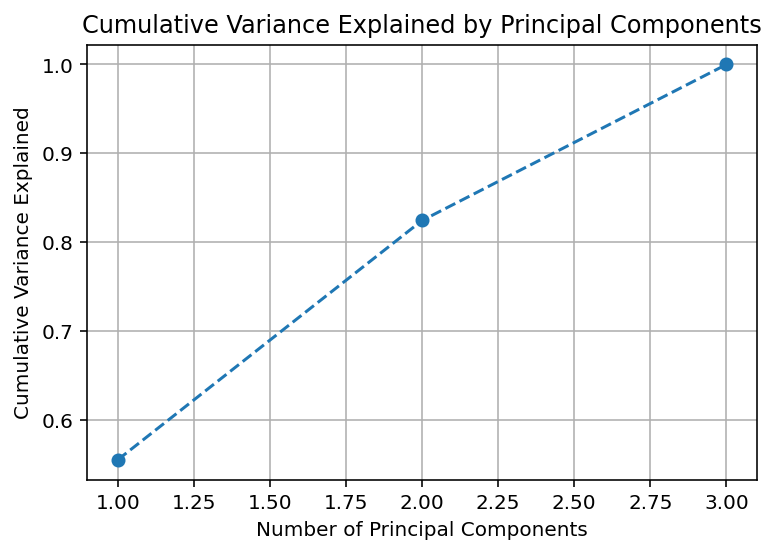

In [20]:
from sklearn.decomposition import PCA

# 创建PCA对象，并拟合数据
pca = PCA()
pca.fit(get_normalize())  # X是你的数据

# 获取每个主成分的方差解释率
explained_variance_ratio = pca.explained_variance_ratio_

# 绘制方差解释率的累积图
import matplotlib.pyplot as plt

cumulative_variance_ratio = explained_variance_ratio.cumsum()
plt.plot(range(1, len(cumulative_variance_ratio) + 1), cumulative_variance_ratio, marker='o', linestyle='--')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Variance Explained')
plt.title('Cumulative Variance Explained by Principal Components')
plt.grid()
plt.show()

It seems clear that we should use 2 principal components to understand our findings, since we only have 3 variables represented in the data.

In [21]:
cumulative_variance_ratio = explained_variance_ratio.cumsum()
desired_variance_ratio = 0.95  # 目标方差解释率
components_needed = np.where(cumulative_variance_ratio >= desired_variance_ratio)[0][0] + 1
components_needed

3

## Which variables correlate in each component?

In [22]:
from sklearn.decomposition import PCA
def get_pca():
    result = None
    pca = PCA(n_components = 3, random_state = 42)
    result = pca.fit(get_normalize())#havn't transform
    return result

In [25]:
def plot_pca_heatmap(pca):
    pc_names=["First PC","Second PC", "Third PC"]
    fig,ax = plt.subplots(figsize=(8,6))
    plt.imshow(pca.components_,cmap = 'plasma')
    plt.xticks(np.arange(0,3,1),['avg_d_mbps','avg_u_mbps','avg_lat_ms'],rotation = 75, fontsize=16)
    plt.yticks(np.arange(0,3,1),pc_names,fontsize=16)
    plt.colorbar()
    plt.tight_layout()
    return

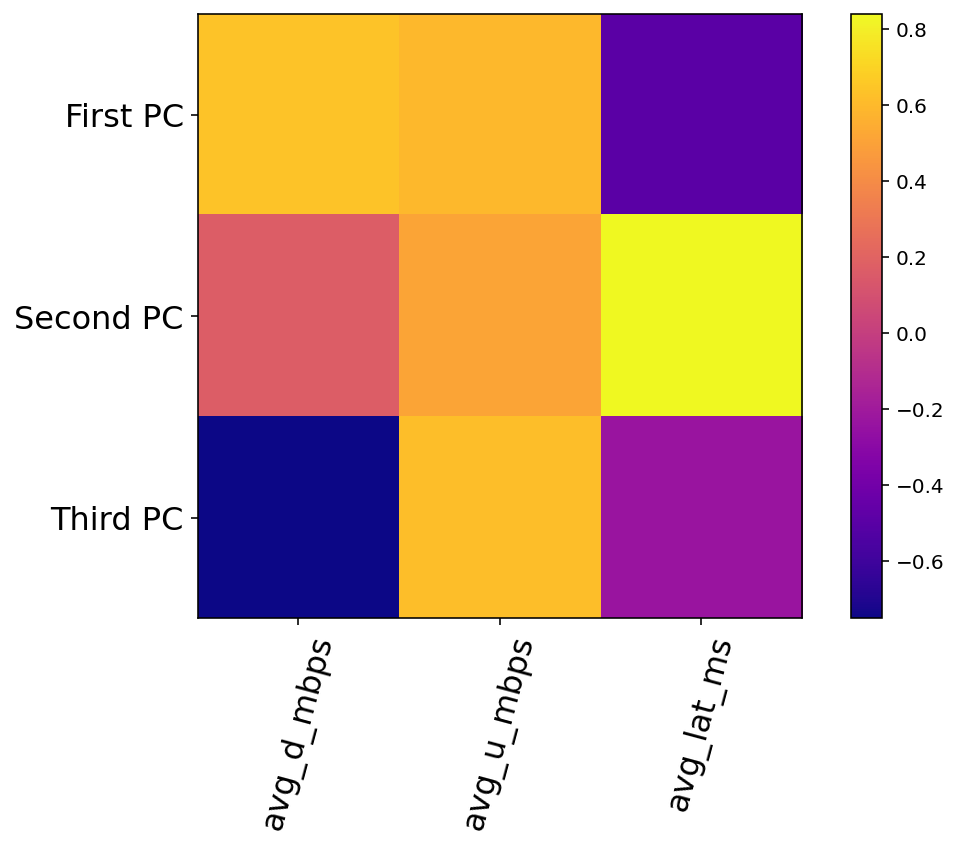

In [26]:
pca = get_pca()
plot_pca_heatmap(pca)

From this we see that there is a grouping of individuals with high speed in upload and download and low latency (high access individuals), a group of individuals with high latency, slightly lower upload and dowload speed, and a group with very low download speed, but high upload speed and latency.

In [27]:
def biplot(score, coeff, maxdim, pcax, pcay, labels=None):
    """Routine to generate a high-quality biplot"""

    pca1 = pcax - 1
    pca2 = pcay - 1
    xs = score[:, pca1]
    ys = score[:, pca2]
    n = min(coeff.shape[0], maxdim)
    scalex = 6.0 / (xs.max() - xs.min())
    scaley = 6.0 / (ys.max() - ys.min())

    text_scale_factor = 1.2

    plt.figure(figsize=(10, 9))
    plt.scatter(xs * scalex, ys * scaley, s=1)


    for i in range(n):
        plt.arrow(0, 0, coeff[i, pca1], coeff[i, pca2], color="r", alpha=0.5)
        if labels is None:
            plt.text(
                coeff[i, pca1] * text_scale_factor,
                coeff[i, pca2] * text_scale_factor,
                "Var" + str(i + 1),
                color="g",
                ha="center",
                va="center",
            )
        else:
            plt.text(
                coeff[i, pca1] * text_scale_factor,
                coeff[i, pca2],
                labels[i],
                color="g",
                ha="center",
                va="center",
            )
    plt.xlim(-1, 1)
    plt.ylim(-1, 1)
    plt.xlabel("PC{}".format(pcax))
    plt.ylabel("PC{}".format(pcay))
    plt.grid()
    plt.tight_layout()

    return


def make_biplot():

    normalized_data = get_normalize()
    pca_non_transformed = get_pca()
    pca_transformed = pca_non_transformed.transform(normalized_data)
    biplot(
       pca_transformed, np.transpose(pca_non_transformed.components_[0:2, :]), 3, 1, 2, labels=['avg_d_mbps','avg_u_mbps','avg_lat_ms']
    )

    return


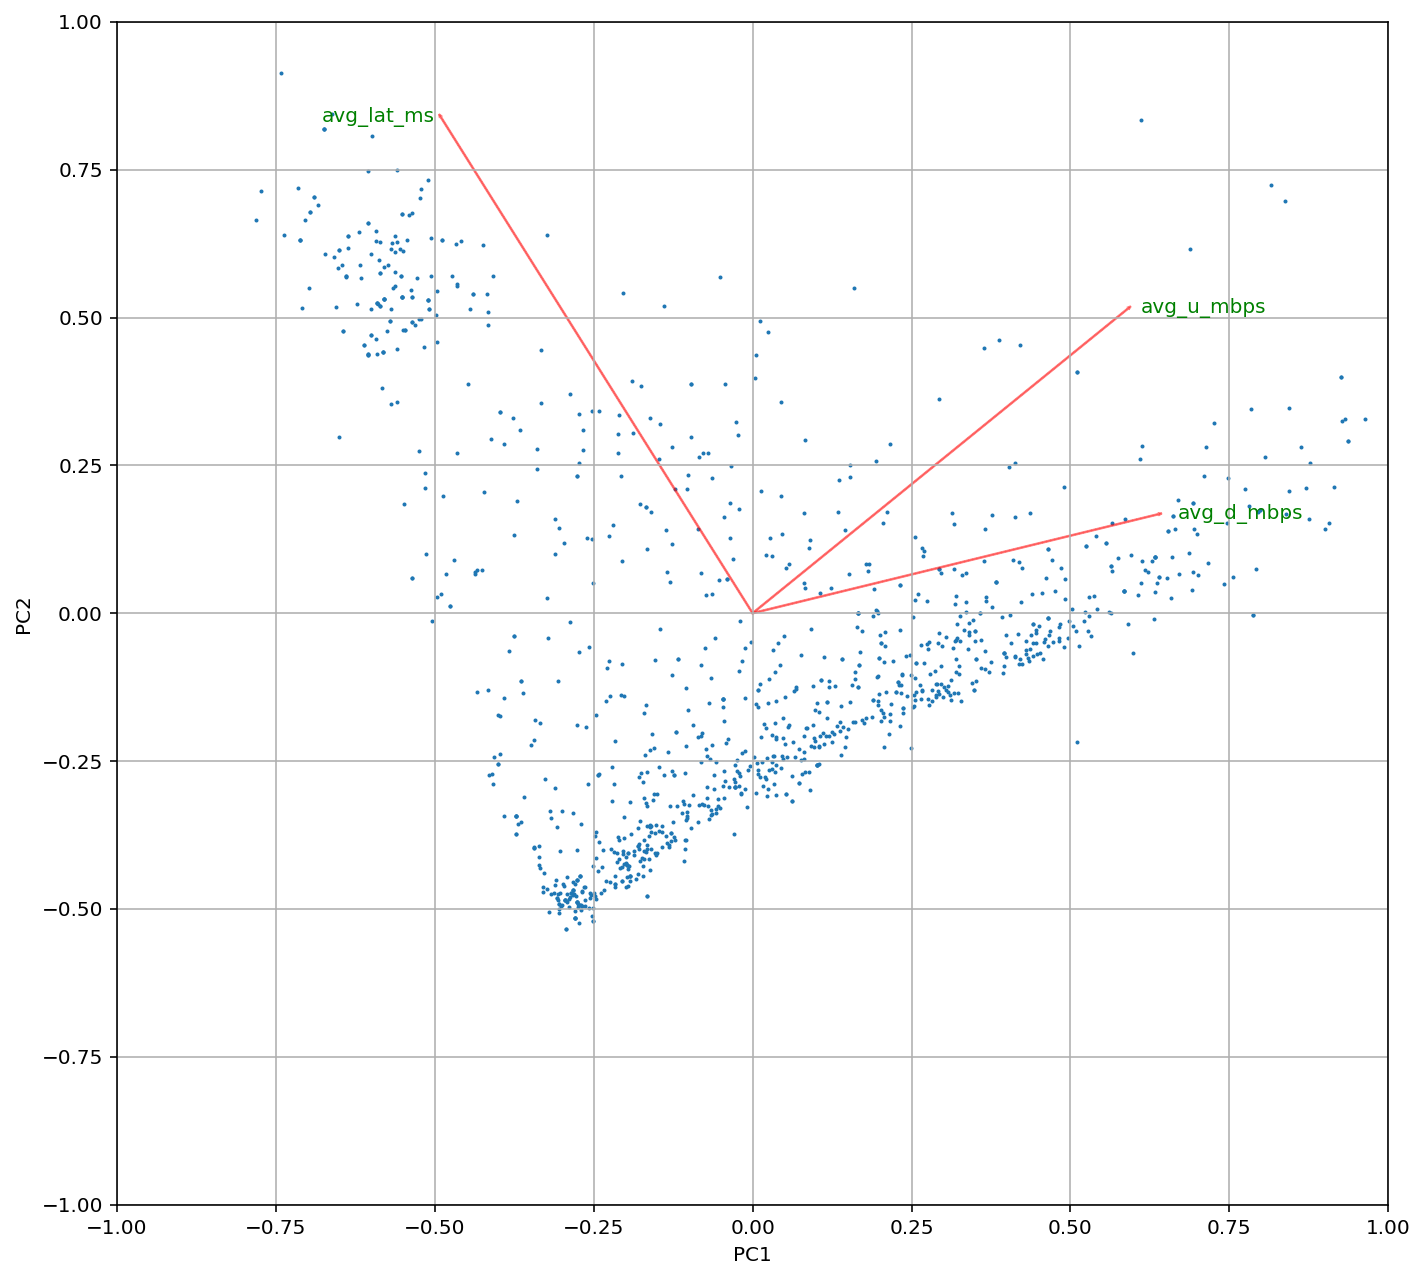

In [28]:
make_biplot()

## 是否需要了解有异常值？

In [29]:
from sklearn.neighbors import LocalOutlierFactor
from sklearn.metrics import silhouette_score


# 首先使用PCA进行降维

normalized_data = get_normalize()
pca_non_transformed = get_pca()
pca_transformed = pca_non_transformed.transform(normalized_data)

n_neighbors_values = [5, 10, 15, 20]
contamination_values = [0.01, 0.05, 0.1, 0.2]

best_silhouette_score = -1
best_params = {}

X = pca_transformed
for n_neighbors in n_neighbors_values:
    for contamination in contamination_values:
        lof = LocalOutlierFactor(n_neighbors=n_neighbors, contamination=contamination)
        y_pred = lof.fit_predict(X)  # X 是您的数据
        silhouette_avg = silhouette_score(X, y_pred)

        # 选择最佳参数组合
        if silhouette_avg > best_silhouette_score:
            best_silhouette_score = silhouette_avg
            best_params['n_neighbors'] = n_neighbors
            best_params['contamination'] = contamination

print("Best Parameters:", best_params)
print("Best Silhouette Score:", best_silhouette_score)

Best Parameters: {'n_neighbors': 20, 'contamination': 0.01}
Best Silhouette Score: 0.803131616552538


In [30]:
# 使用 LOF 来检测异常值
lof = LocalOutlierFactor(n_neighbors=15, contamination=0.01)  # 根据需要调整参数
y_pred = lof.fit_predict(X)
y_pred_series = pd.Series(y_pred)
print(y_pred_series)
print(type(y_pred_series))
y_pred_series.value_counts()


0       1
1       1
2       1
3       1
4       1
       ..
1169    1
1170    1
1171    1
1172    1
1173    1
Length: 1174, dtype: int64
<class 'pandas.core.series.Series'>


 1    1162
-1      12
dtype: int64

In [31]:
selected_df = gdf[['TWNRNGSEC','avg_d_mbps','avg_u_mbps','avg_lat_ms']]
grouped_df = selected_df.groupby('TWNRNGSEC').mean()
grouped_df['y_pred'] = y_pred_series.values
no_outliers_df = grouped_df[grouped_df['y_pred']==1]
gdf_new = gdf[gdf['TWNRNGSEC'].isin(no_outliers_df.index)]
print(len(gdf),len(gdf_new))

18295 16412


In [32]:
def get_new_normalize():
    result = None
    result = StandardScaler().fit_transform(no_outliers_df)
    return result

def get_new_pca():
    result = None
    pca = PCA(n_components = 3, random_state = 42)
    result = pca.fit(get_new_normalize())#havn't transform
    return result

## Clustering

### Can we find clusters in the data that point to the relative significance of the variables?
#### How many clusters should we use?

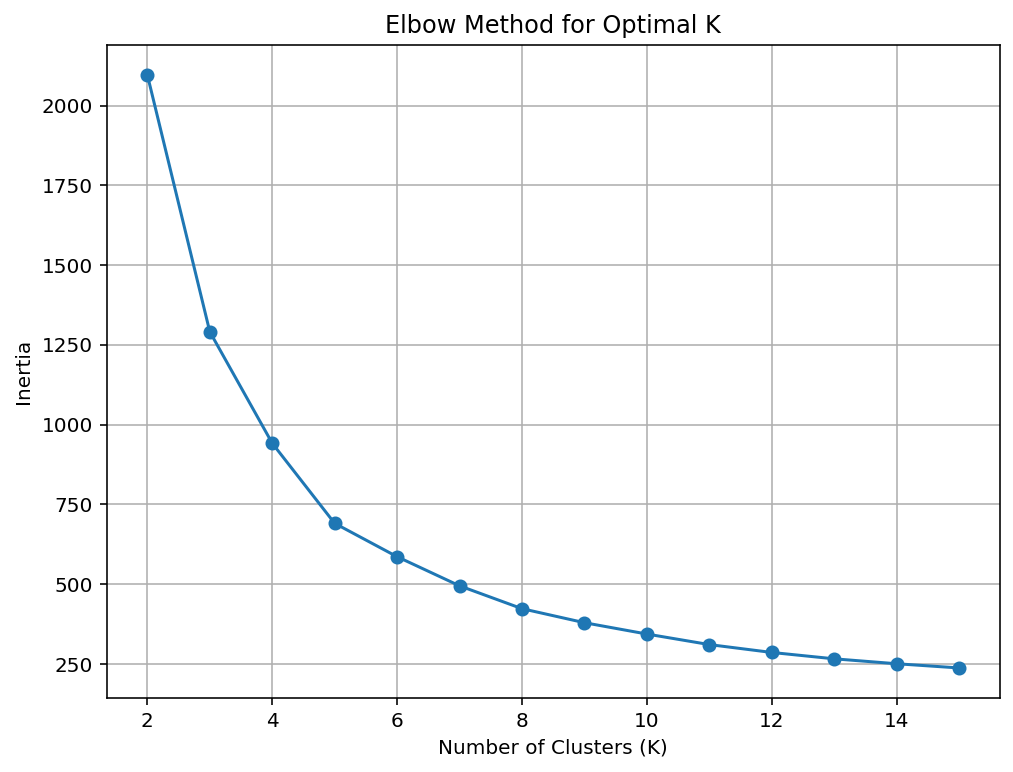

In [33]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# 假设你的数据是normalized_data
normalized_data = get_new_normalize()
pca_non_transformed = get_new_pca()
pca_transformed = pca_non_transformed.transform(normalized_data)
X=pca_transformed
# 定义一组可能的K值
k_values = range(2, 16)
inertias = []

# 计算每个K值下的簇内平方和
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertias.append(kmeans.inertia_)

# 绘制肘部法则图表
plt.figure(figsize=(8, 6))
plt.plot(k_values, inertias, marker='o')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal K')
plt.grid(True)
plt.show()

In [34]:
from sklearn.cluster import KMeans
from sklearn.metrics import calinski_harabasz_score, davies_bouldin_score

normalized_data = get_new_normalize()
pca_non_transformed = get_new_pca()
pca_transformed = pca_non_transformed.transform(normalized_data)

# 定义一组可能的K值
k_values = range(2, 16)

best_calinski_harabasz = -1
best_davies_bouldin = float("inf")
best_k = 0

# 计算每个K值下的簇内平方和
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans = kmeans.fit(pca_transformed)
    labels = kmeans.labels_

    calinski_harabasz = calinski_harabasz_score(pca_transformed, labels)
    davies_bouldin = davies_bouldin_score(pca_transformed, labels)
    
    # 选择最佳的K值
    if calinski_harabasz > best_calinski_harabasz and davies_bouldin < best_davies_bouldin:
        best_calinski_harabasz = calinski_harabasz
        best_davies_bouldin = davies_bouldin
        best_k = k

print("Best K value:", best_k)
print("Best Calinski-Harabasz score(K-means):", best_calinski_harabasz)
print("Best Davies-Bouldin score(K-means):", best_davies_bouldin)

Best K value: 4
Best Calinski-Harabasz score(K-means): 1042.6793999610109
Best Davies-Bouldin score(K-means): 0.660755759625341


In [35]:
def get_kmeans(best_k = 4):
    result = None
    kmeans = KMeans(n_clusters=best_k, random_state=42)
    result = kmeans.fit(pca_transformed)  
    return result  


In [36]:
# %matplotlib inline
# %matplotlib notebook 

from mpl_toolkits.mplot3d import Axes3D  # 导入3D绘图工具
# from ipywidgets import interact


def kmeans_3d_plot():
    kmeans = get_kmeans(best_k = 4)
    cluster_labels = list(kmeans.labels_)
    X = list(pca_transformed[:,0])
    Y = list(pca_transformed[:,1])
    Z = list(pca_transformed[:,2])
    # 创建一个散点图来显示数据点和它们的簇
    # 创建一个3D图形
    fig = plt.figure(figsize=(12, 8))  # 创建一个图形，指定尺寸
    ax = fig.add_subplot(projection='3d')  # 创建一个3D子图

    sc = ax.scatter(X, Y, Z, c=cluster_labels, cmap='viridis', marker='o',s=5)
    ax.set_xlabel('avg_d_mbps')
    ax.set_ylabel('avg_u_mbps')
    ax.set_zlabel('avg_lat_ms')
    ax.set_title('Kmeans 3D Plot')
    
    legend = ax.legend(*sc.legend_elements(), loc="lower right", title="Clusters")
    ax.add_artist(legend)
    

    ax.set_xlim([min(X), max(X)])
    ax.set_ylim([min(Y), max(Y)])
    ax.set_zlim([min(Z), max(Z)])
    
    # 显示图形
    plt.show()


    return 


In [39]:
!pip install scikit-learn-extra

     |████████████████████████████████| 1.9 MB 1.2 MB/s eta 0:00:01


In [40]:
from sklearn_extra.cluster import KMedoids


# normalized_data = get_new_normalize()
# pca_non_transformed = get_new_pca()
# pca_transformed = pca_non_transformed.transform(normalized_data)

# Define a range of possible K values
k_values = range(2, 16)

best_calinski_harabasz = -1
best_davies_bouldin = float("inf")
best_k = 0

# Calculate Calinski-Harabasz and Davies-Bouldin scores for each K value
for k in k_values:
    kmedoids = KMedoids(n_clusters=k, random_state=42, metric='manhattan')
    kmedoids.fit(pca_transformed)
    labels = kmedoids.labels_

    calinski_harabasz = calinski_harabasz_score(pca_transformed, labels)
    davies_bouldin = davies_bouldin_score(pca_transformed, labels)
    
    # Select the best K value
    if calinski_harabasz > best_calinski_harabasz and davies_bouldin < best_davies_bouldin:
        best_calinski_harabasz = calinski_harabasz
        best_davies_bouldin = davies_bouldin
        best_k = k

print("Best K value (KMedoids):", best_k)
print("Best Calinski-Harabasz score (KMedoids):", best_calinski_harabasz)
print("Best Davies-Bouldin score (KMedoids):", best_davies_bouldin)

Best K value (KMedoids): 3
Best Calinski-Harabasz score (KMedoids): 959.1227333390324
Best Davies-Bouldin score (KMedoids): 0.7334806677359061


In [41]:
def get_kmedoids(best_k = 3):
    result = None
    kmedoids = KMedoids(n_clusters=best_k, random_state=42)
    result = kmedoids.fit(pca_transformed)  
    return result  

In [42]:
# %matplotlib inline
# %matplotlib notebook 

from mpl_toolkits.mplot3d import Axes3D  # 导入3D绘图工具
# from ipywidgets import interact

def kmedoids_3d_plot():
    kmedoids = get_kmedoids(best_k = 3)
    cluster_labels = list(kmedoids.labels_)
    X = list(pca_transformed[:,0])
    Y = list(pca_transformed[:,1])
    Z = list(pca_transformed[:,2])
    # 创建一个散点图来显示数据点和它们的簇
    # 创建一个3D图形
    fig = plt.figure(figsize=(12, 8))  # 创建一个图形，指定尺寸
    ax = fig.add_subplot(projection='3d')  # 创建一个3D子图

    sc = ax.scatter(X, Y, Z, c=cluster_labels, cmap='viridis', marker='o',s=5)
    ax.set_xlabel('avg_d_mbps')
    ax.set_ylabel('avg_u_mbps')
    ax.set_zlabel('avg_lat_ms')
    ax.set_title('Kmedoids 3D Plot')
    
    legend = ax.legend(*sc.legend_elements(), loc="lower right", title="Clusters")
    ax.add_artist(legend)
    

    ax.set_xlim([min(X), max(X)])
    ax.set_ylim([min(Y), max(Y)])
    ax.set_zlim([min(Z), max(Z)])
    
    # 显示图形
    plt.show()


    return 


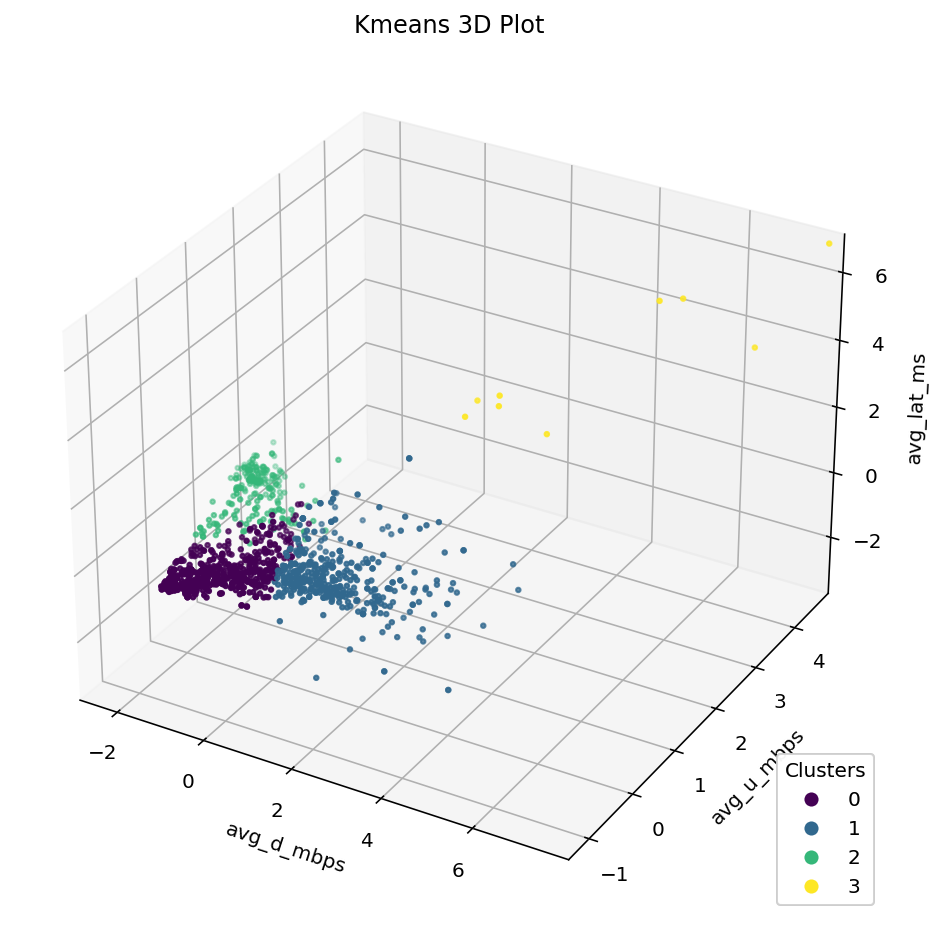

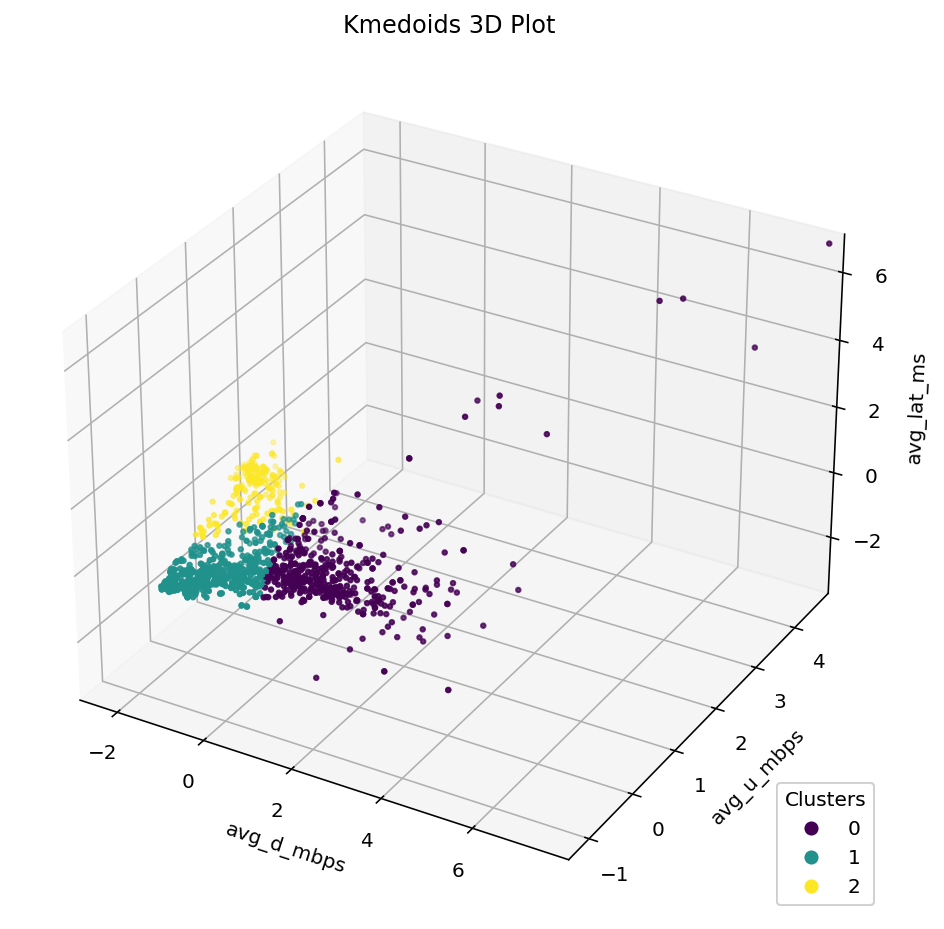

In [43]:
kmeans_3d_plot()
kmedoids_3d_plot()

## Cluster Labeling - Improving Cluster Representations 

In [44]:
import numpy as np
from sklearn_extra.cluster import KMedoids
from sklearn.metrics import pairwise_distances_argmin_min

# 创建KMeans模型并拟合数据
X = pca_transformed
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(X)  # X是您的数据

# 获取每个簇的中心点
cluster_centers = kmeans.cluster_centers_

# 找到每个簇中距离最近的数据点的索引
closest_points_indices = pairwise_distances_argmin_min(cluster_centers, X)

# 分配簇的标签或名称
cluster_labels = ['Cluster 1', 'Cluster 2', 'Cluster 3','Cluster 4']  
# 列名
column_names = ['avg_d_mbps', 'avg_u_mbps', 'avg_lat_ms']

# 获取每个簇的数据点数量
cluster_assignments = kmeans.labels_
cluster_sizes = np.bincount(cluster_assignments)

# 显示每个簇的典型数据点、标签和数据点数量
for i, cluster_center in enumerate(cluster_centers):
    cluster_name = cluster_labels[i]
    closest_data_point_idx = int(closest_points_indices[0][i])  # Ensure it's an integer index
    
    closest_data_point = no_outliers_df.iloc[closest_data_point_idx]  # Use .iloc to index DataFrame
    
    cluster_size = cluster_sizes[i]  # 获取簇的数据点数量
    
    print(f"Cluster: {cluster_name}")
    for col, value in zip(column_names, closest_data_point):
        print(f"{col}: {value}")
    print(f"Data Points in Cluster: {cluster_size}")

Cluster: Cluster 1
avg_d_mbps: 25.9764
avg_u_mbps: 4.726999999999999
avg_lat_ms: 104.4
Data Points in Cluster: 544
Cluster: Cluster 2
avg_d_mbps: 112.26414285714286
avg_u_mbps: 12.94657142857143
avg_lat_ms: 61.42857142857143
Data Points in Cluster: 393
Cluster: Cluster 3
avg_d_mbps: 18.574
avg_u_mbps: 5.011
avg_lat_ms: 598.0
Data Points in Cluster: 216
Cluster: Cluster 4
avg_d_mbps: 36.05
avg_u_mbps: 45.363499999999995
avg_lat_ms: 45.0
Data Points in Cluster: 9


In [45]:
import numpy as np
from sklearn_extra.cluster import KMedoids
from sklearn.metrics import pairwise_distances_argmin_min

# 创建KMedoids模型并拟合数据
X=pca_transformed
kmedoids = KMedoids(n_clusters=3, random_state=42, metric='manhattan')
kmedoids = kmedoids.fit(X)  # X是您的数据

# 获取每个簇的中心点索引
medoid_indices = kmedoids.medoid_indices_

# 找到每个簇中距离最近的数据点的索引
closest_points_indices = pairwise_distances_argmin_min(X[medoid_indices], X)

# 分配簇的标签或名称
cluster_labels = ['Cluster 1', 'Cluster 2', 'Cluster 3']  
# 列名
column_names = ['avg_d_mbps', 'avg_u_mbps', 'avg_lat_ms']

# 获取每个簇的数据点数量
cluster_assignments = kmedoids.labels_
cluster_sizes = np.bincount(cluster_assignments)

# 显示每个簇的典型数据点、标签和数据点数量
for i, cluster_center in enumerate(medoid_indices):
    
    cluster_name = cluster_labels[i]
    
    closest_data_point_idx = int(closest_points_indices[0][i])  # Ensure it's an integer index
    
    closest_data_point = no_outliers_df.iloc[closest_data_point_idx]  # Use .iloc to index DataFrame
    
    cluster_size = cluster_sizes[i]  # 获取簇的数据点数量
    
    print(f"Cluster: {cluster_name}")
    for col, value in zip(column_names, closest_data_point):
        print(f"{col}: {value}")
    print(f"Data Points in Cluster: {cluster_size}")


Cluster: Cluster 1
avg_d_mbps: 26.078708333333335
avg_u_mbps: 4.026645833333333
avg_lat_ms: 85.95833333333333
Data Points in Cluster: 519
Cluster: Cluster 2
avg_d_mbps: 17.564
avg_u_mbps: 3.897
avg_lat_ms: 637.0
Data Points in Cluster: 207
Cluster: Cluster 3
avg_d_mbps: 98.82059999999998
avg_u_mbps: 12.1036
avg_lat_ms: 57.2
Data Points in Cluster: 436


In [46]:

# Calculate the mean of columns 'avg_d_mbps', 'avg_u_mbps', and 'avg_lat_ms' in 'no_outliers_df'
avg_d_mbps_mean = no_outliers_df['avg_d_mbps'].mean()
avg_u_mbps_mean = no_outliers_df['avg_u_mbps'].mean()
avg_lat_ms_mean = no_outliers_df['avg_lat_ms'].mean()

# Print the results
print(f'Mean avg_d_mbps: {avg_d_mbps_mean}')
print(f'Mean avg_u_mbps: {avg_u_mbps_mean}')
print(f'Mean avg_lat_ms: {avg_lat_ms_mean}')

Mean avg_d_mbps: 55.864813638192466
Mean avg_u_mbps: 7.67303784674167
Mean avg_lat_ms: 176.98537882085915


**FINDING**
From these results we can label a few clusters to better interpret them:

- Cluster 1: Good Network

 avg_d_mbps: 84.5928 （Mean avg_d_mbps: 42.98314906192465）

 avg_u_mbps: 11.394400000000001 （Mean avg_u_mbps: 7.082923269126921）

 avg_lat_ms: 62.55 （Mean avg_lat_ms: 200.55398776810142）

 Data Points in Cluster: 323
 

- Cluster 2: Not Good Network

 avg_d_mbps: 15.450999999999999 （Mean avg_d_mbps: 42.98314906192465）
 
 avg_u_mbps: 2.5548571428571427 （Mean avg_u_mbps: 7.082923269126921）
    
 avg_lat_ms: 64.71428571428571 （Mean avg_lat_ms: 200.55398776810142）
    
 Data Points in Cluster: 419


- Cluster 3: Poor Network

 avg_d_mbps: 14.149666666666667 （Mean avg_d_mbps: 42.98314906192465）

 avg_u_mbps: 3.765333333333333 （Mean avg_u_mbps: 7.082923269126921）

 avg_lat_ms: 640.3333333333334 （Mean avg_lat_ms: 200.55398776810142）
    
 Data Points in Cluster: 217



In [47]:
import geopandas as gpd
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display
from matplotlib.colors import Normalize

cluster_labels = kmedoids.labels_

for i in [0,1,2]:
    filtered_indices = no_outliers_df.iloc[np.where(cluster_labels == i)].index
    gdf_new.loc[gdf_new['TWNRNGSEC'].isin(filtered_indices), 'cluster_labels'] = i


# 创建标签选择下拉菜单

label_selectors = widgets.Dropdown(
    options=['All Clusters', 'Cluster 1: Good Network', 'Cluster 2: Not Good Network', 'Cluster 3: Poor Network'],
    value='All Clusters', description='Select Label:')


# 创建标签到颜色的映射字典
label_colors = {
    'All Clusters': 'viridis',  # 使用颜色映射
    'Cluster 1: Good Network': 'purple',
    'Cluster 2: Not Good Network': 'green',
    'Cluster 3: Poor Network': 'yellow'
}


# 在绘图函数中使用映射字典
def plot_clusters_on_map(labels):
    gdf_filtered=None
    plt.close()
    plt.rcParams.update({'axes.facecolor': 'black'})


    if labels == 'All Clusters':
        
        gdf_filtered=None 
        gdf_filtered = gdf_new
        title = labels
        cmap = label_colors[labels]  # 从映射字典中获取颜色
    
     
    elif labels == 'Cluster 1: Good Network':
        
        gdf_filtered=None 
        gdf_filtered = gdf_new[gdf_new['cluster_labels'] == 0]  # 默认显示一个标签
        title = "Cluster 1: Good Network"
        cmap = label_colors[title]
        
      
    elif labels == 'Cluster 2: Not Good Network':
        
        gdf_filtered=None 
        gdf_filtered = gdf_new[gdf_new['cluster_labels'] == 1]  # 默认显示一个标签
        title = "Cluster 2: Not Good Network"
        cmap = label_colors[title]
    
    elif labels == 'Cluster 3: Poor Network':
        
        gdf_filtered=None 
        gdf_filtered = gdf_new[gdf_new['cluster_labels'] == 2]  # 默认显示一个标签
        title = "Cluster 3: Poor Network"
        cmap = label_colors[title]
    
    gdf_filtered = gpd.GeoDataFrame(gdf_filtered, crs='epsg:4326', geometry='geometry')
    
    if labels == 'All Clusters':
        
        gdf_filtered.plot(column= 'cluster_labels', cmap=cmap,figsize=(10, 6))
    else:
        gdf_filtered.plot(color=cmap,figsize=(10,6))
    

    plt.grid(True)

    plt.title(title, fontsize=16, fontweight='bold')
#     plt.tight_layout()
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
    plt.xlim(-86, -83)  # 设置经度范围
    plt.ylim(45.8, 47)    # 设置纬度范围

    return plt

# 显示标签选择下拉菜单和地图
widgets.interactive(plot_clusters_on_map, labels=label_selectors)



interactive(children=(Dropdown(description='Select Label:', options=('All Clusters', 'Cluster 1: Good Network'…